In [ ]:
# Crop Yield Prediction Using Machine Learning And Flask Deployment

In [ ]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Adding Dataset
df = pd.read_csv("/content/WildBlueberryPollinationSimulationData.csv")
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [ ]:
# print the metadata of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [ ]:
# data description
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [ ]:
df.shape

(777, 18)

In [ ]:
df.isnull().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [ ]:
# Here there is no use of Row#
df.drop('Row#',axis=1,inplace=True)


In [ ]:
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [ ]:
# Check the duplicate values

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
772    False
773    False
774    False
775    False
776    False
Length: 777, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
# there is no Duplicate values

In [ ]:
df.describe(include='all')

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


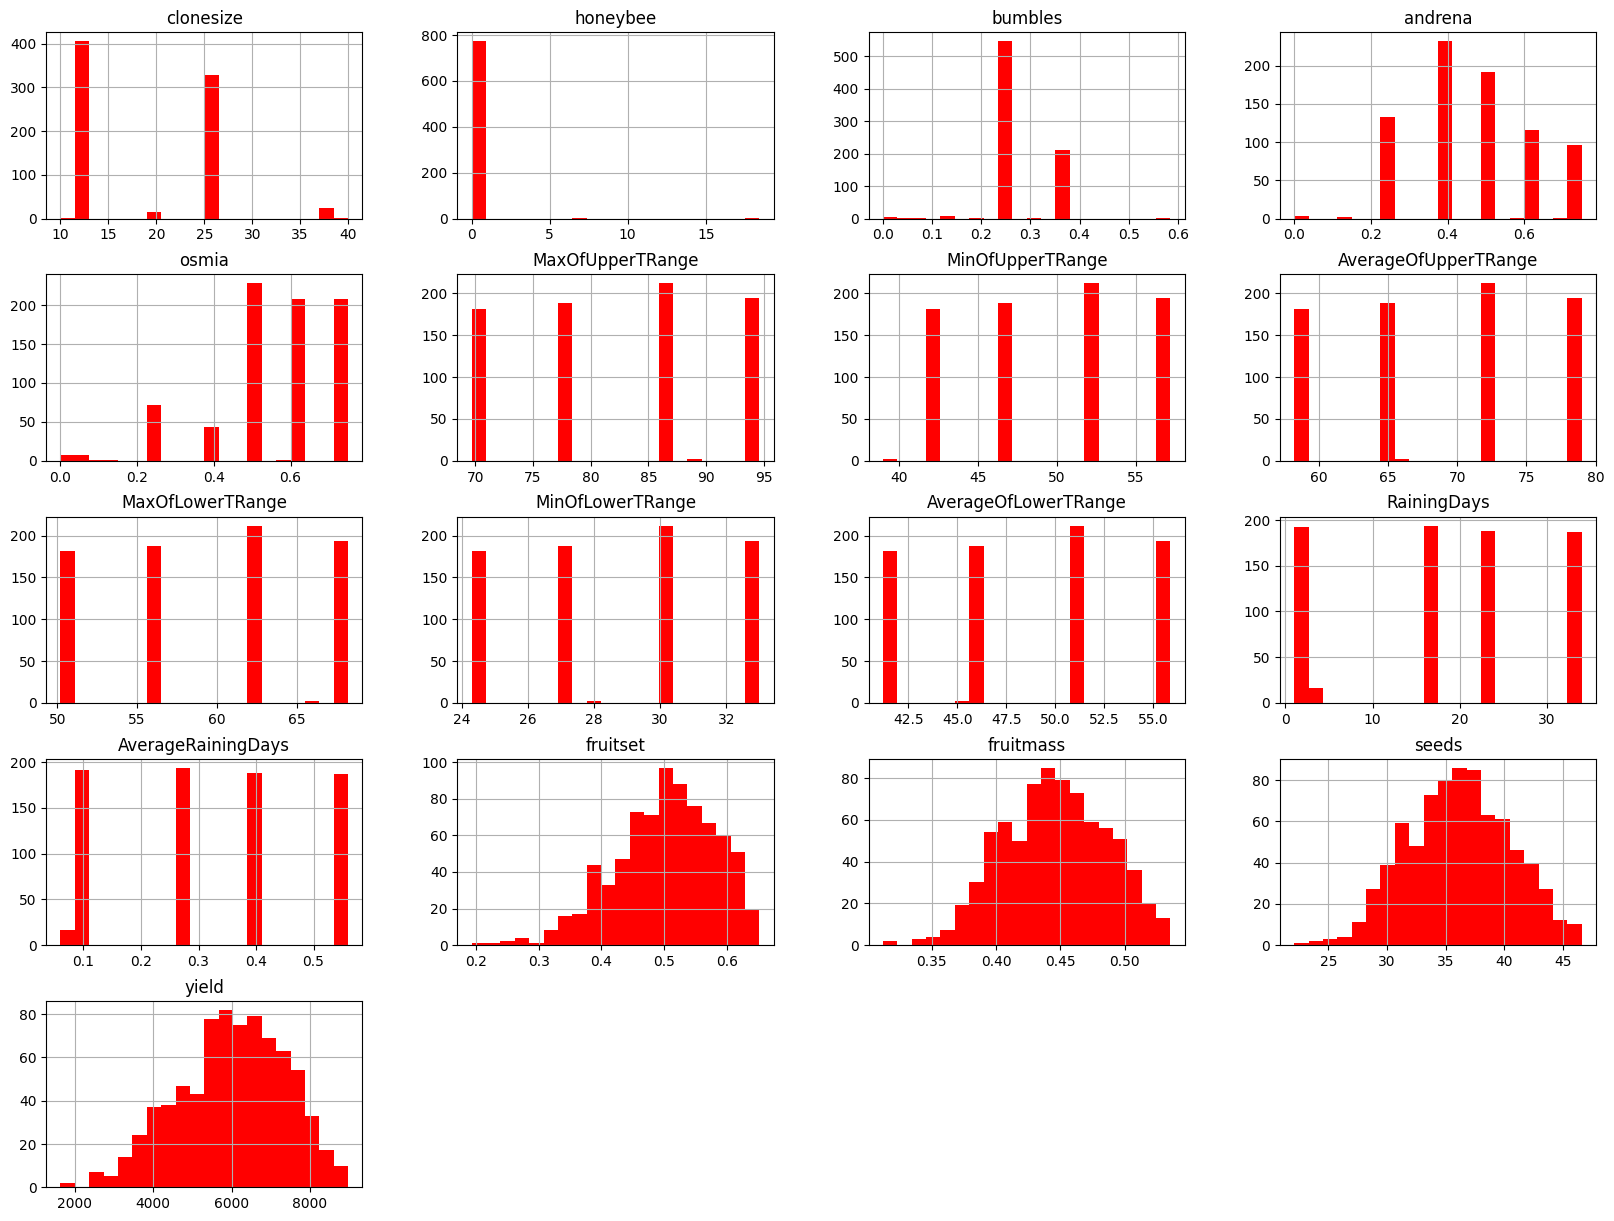

In [ ]:
df.hist(layout=(5,4),figsize=(20,15),color='red',bins=20)
plt.show()

In [ ]:
df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [ ]:
# Exploratory Data Analysis

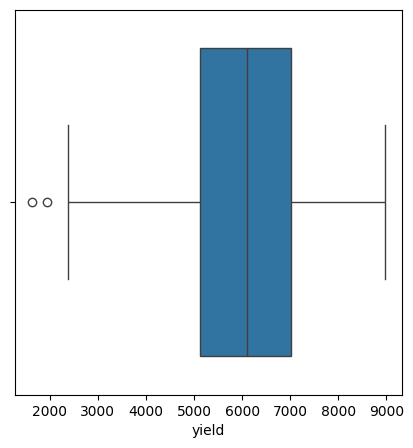

In [ ]:
# plot the boxplot using seaborn library of the target variable 'yield'
plt.figure(figsize=(5,5))
sns.boxplot(x='yield', data=df)
plt.show()

In [ ]:
df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [ ]:
d1 = df['clonesize'], df['honeybee'],df['osmia'],df['andrena'], df['bumbles']

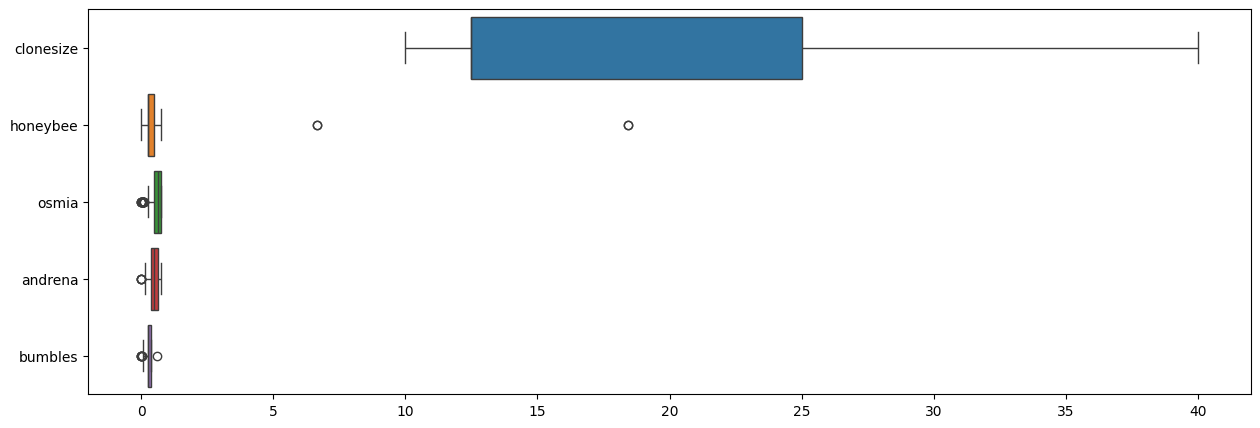

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=d1, orient='h')
plt.show()

<Axes: xlabel='bumbles'>

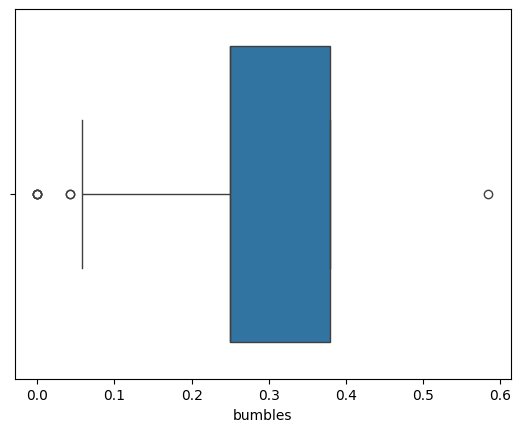

In [ ]:
sns.boxplot(x="bumbles",data=df)

In [ ]:
# Heatmap of the Dataset

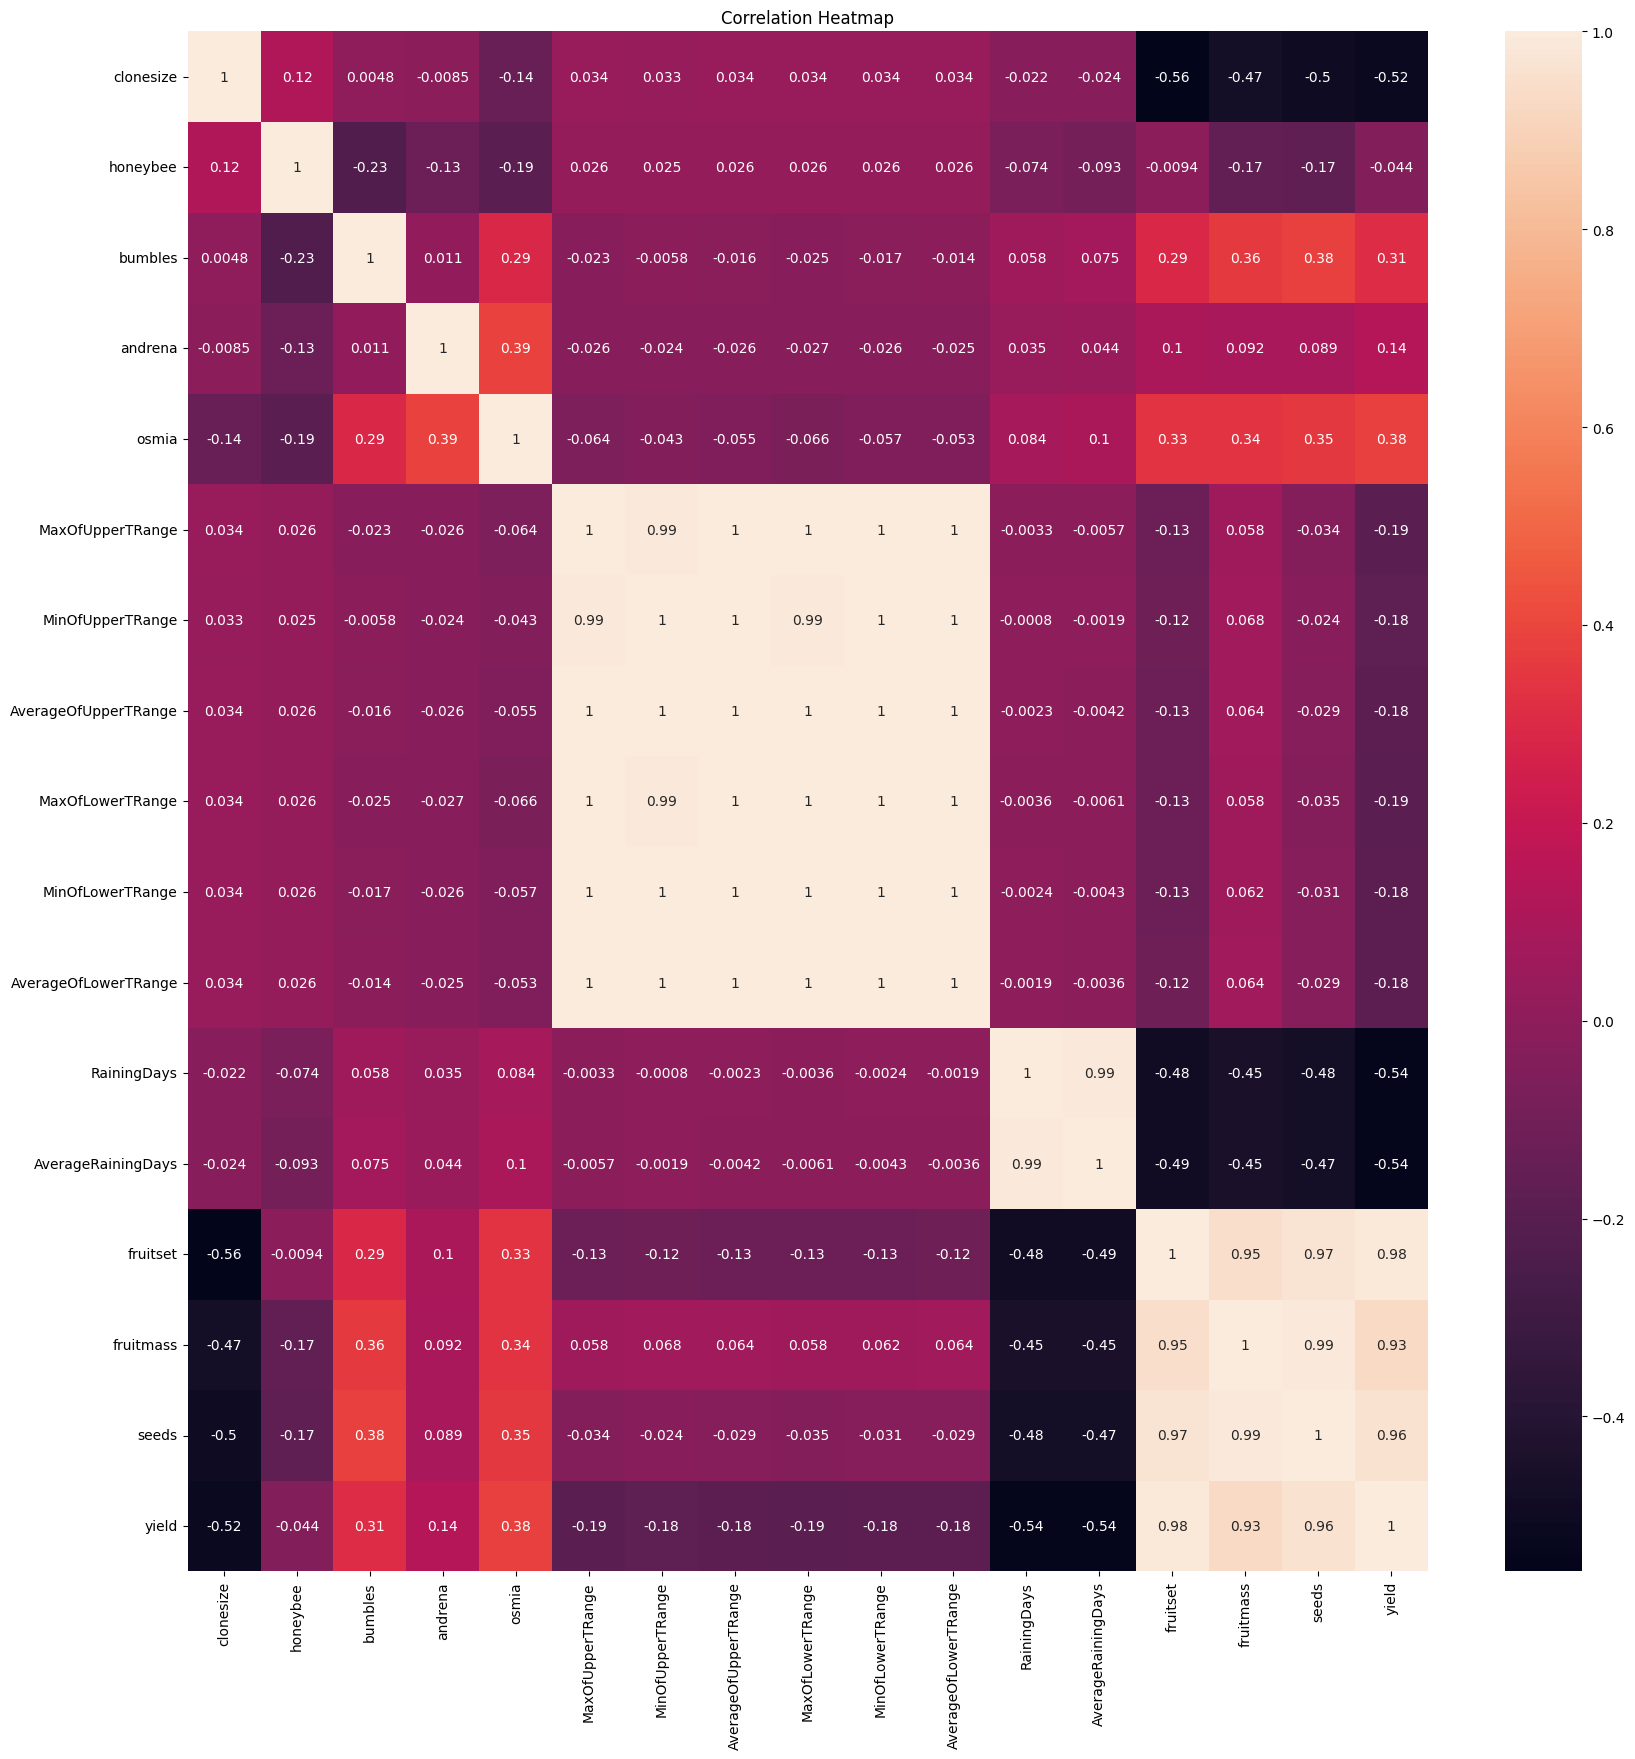

In [ ]:
# create featureset and target variable from the dataset
indep_data = df.drop('yield', axis=1)
dep_data = df['yield']

# plot the heatmap from the dataset
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

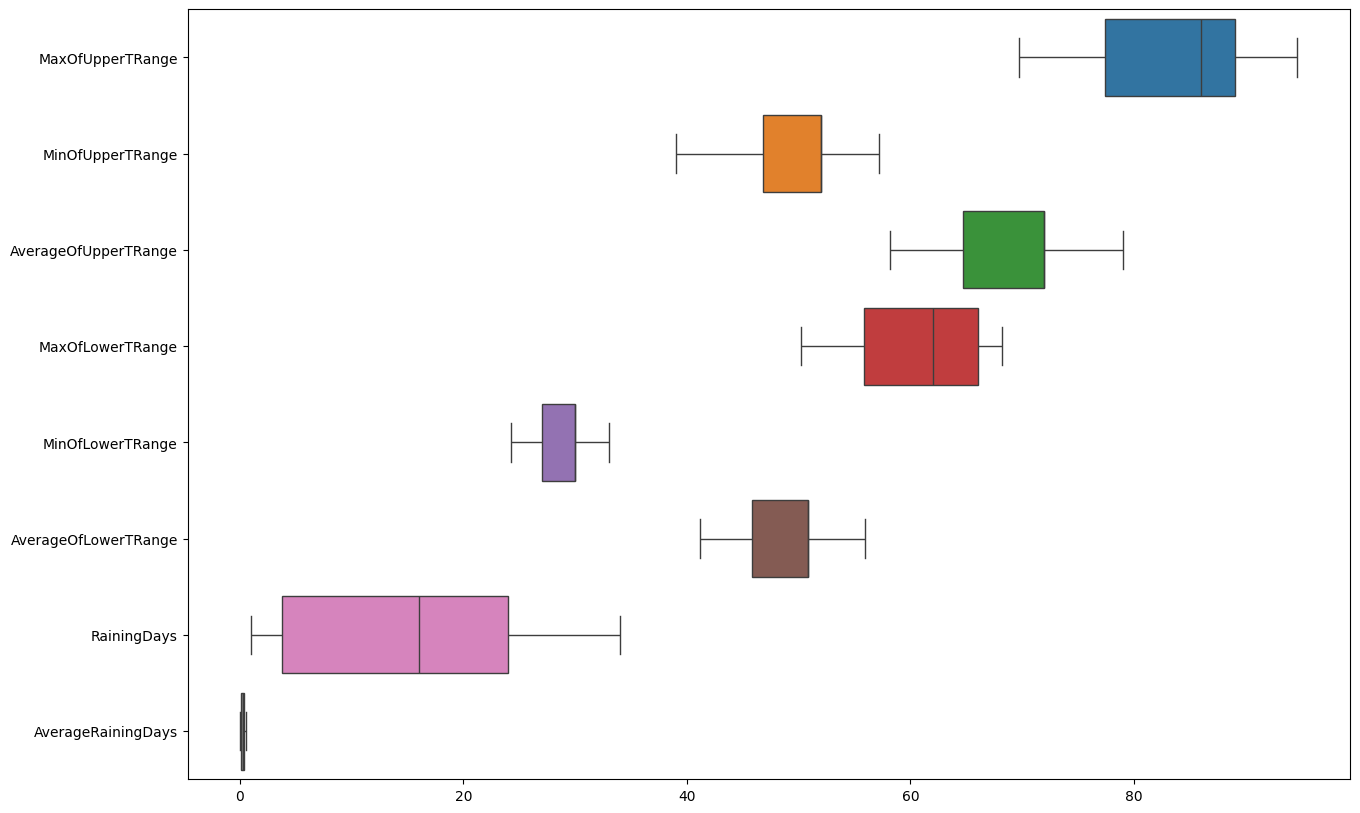

In [ ]:
# matplotlib subplot for the categorical feature
nominal_df = df[['MaxOfUpperTRange','MinOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange',
               'MinOfLowerTRange','AverageOfLowerTRange','RainingDays','AverageRainingDays']]
plt.figure(figsize=(15, 10))
sns.boxplot(data=nominal_df,orient='h')
plt.show()

In [ ]:
indep_data = df.drop('yield', axis=1)
dep_data = df['yield']

In [ ]:
indep_data.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

In [ ]:
dep_data

0      3813.165795
1      4947.605663
2      3866.798965
3      4303.943030
4      3436.493543
          ...     
772    5333.873335
773    3373.436842
774    4203.027624
775    4166.299735
776    3943.131681
Name: yield, Length: 777, dtype: float64

In [ ]:
indep_data = df.drop('yield', axis=1)
dep_data = df['yield']

In [ ]:
x = df.drop('yield', axis=1)
y = df[['yield']]

In [ ]:
x.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714


In [ ]:
y.head()

,yield
0,3813.165795
1,4947.605663
2,3866.798965
3,4303.943030
4,3436.493543


In [ ]:
# IQR - calculating Inter-quartile Range (IQR)
# finding each IQR for x

q1 = x.quantile(0.25)
q3 = x.quantile(0.75)
IQR = q3 - q1
print(IQR)

clonesize               12.500000
honeybee                 0.250000
bumbles                  0.130000
andrena                  0.250000
osmia                    0.250000
MaxOfUpperTRange        11.600000
MinOfUpperTRange         5.200000
AverageOfUpperTRange     7.200000
MaxOfLowerTRange        10.200000
MinOfLowerTRange         3.000000
AverageOfLowerTRange     5.000000
RainingDays             20.230000
AverageRainingDays       0.290000
fruitset                 0.106571
fruitmass                0.059869
seeds                    6.123577
dtype: float64


In [ ]:
lower_bound = (q1-1.5*IQR)
upper_bound = (q3+1.5*IQR)


In [ ]:
# Align the DataFrame and Series before comparison
df_aligned, lower_bound_aligned = df.align(lower_bound, axis=1, copy=False)
df_aligned, upper_bound_aligned = df.align(upper_bound, axis=1, copy=False)

# Now perform the filtering with aligned objects
iqr_ = df_aligned[~ ((df_aligned < lower_bound_aligned)| (df_aligned > upper_bound_aligned)).any(axis=1)]

In [ ]:
iqr_.shape

(752, 17)

In [ ]:
df

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


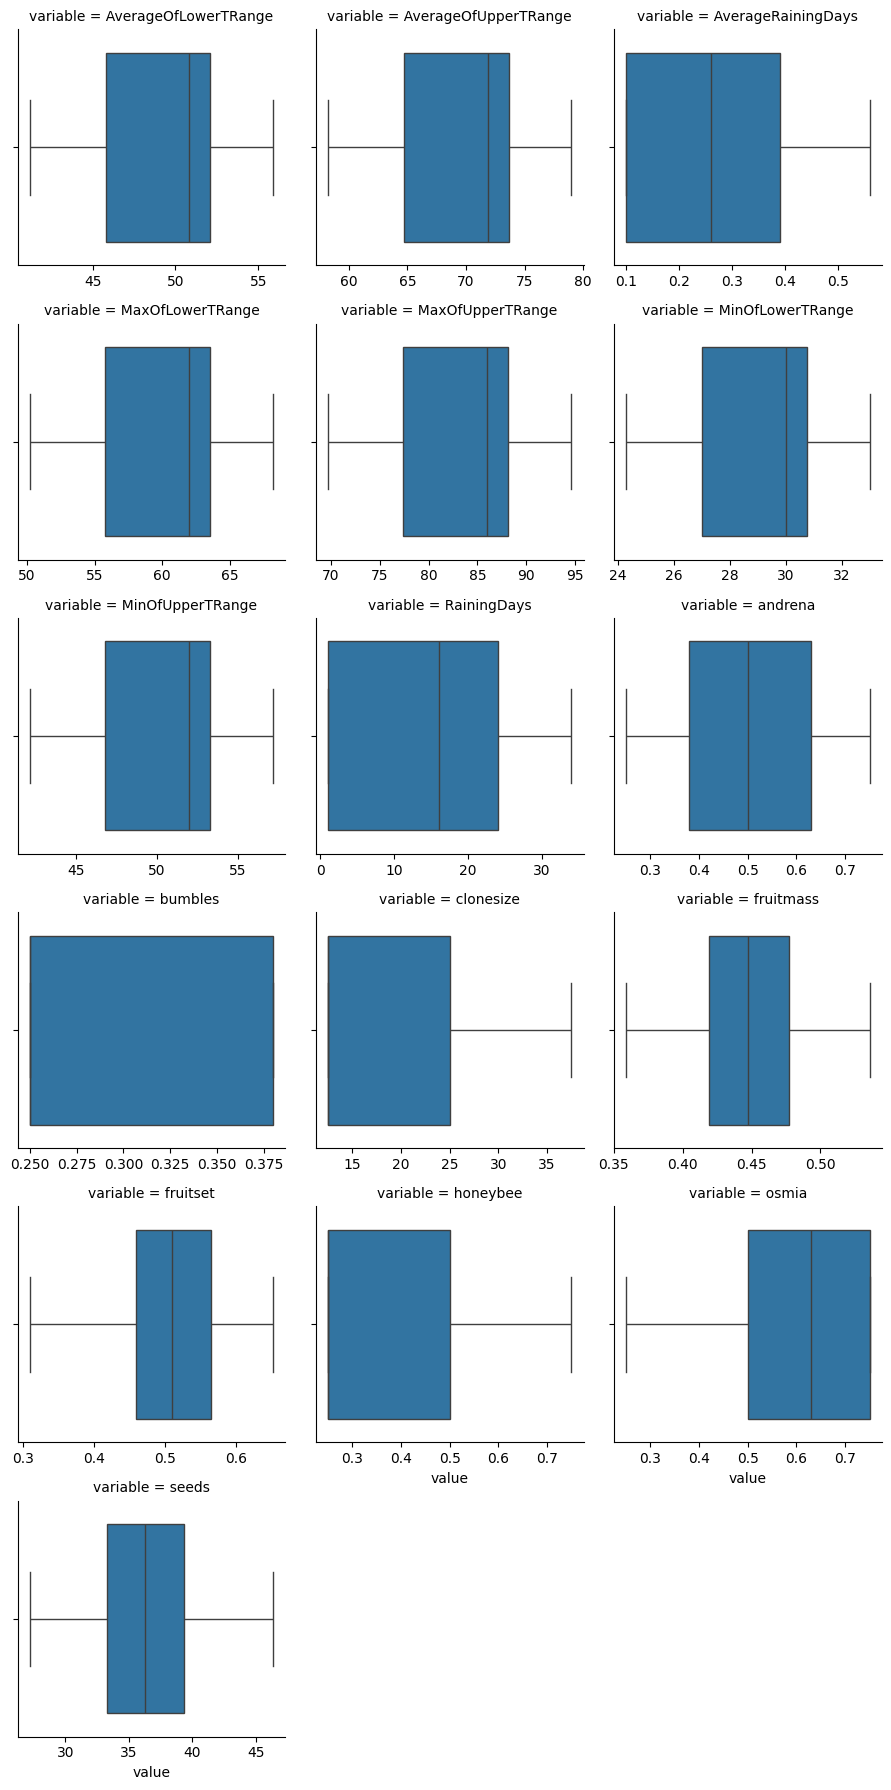

In [ ]:
unpivot = pd.melt(iqr_, iqr_.describe().columns[-1], iqr_.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [ ]:
iqr_.head()

,AverageOfLowerTRange,AverageOfUpperTRange,AverageRainingDays,MaxOfLowerTRange,MaxOfUpperTRange,MinOfLowerTRange,MinOfUpperTRange,RainingDays,andrena,bumbles,clonesize,fruitmass,fruitset,honeybee,osmia,seeds,yield
0,50.8,71.9,0.26,62.0,86.0,30.0,52.0,16.0,0.25,0.25,37.5,0.408159,0.410652,0.75,0.25,31.678898,3813.165795
1,50.8,71.9,0.10,62.0,86.0,30.0,52.0,1.0,0.25,0.25,37.5,0.425458,0.444254,0.75,0.25,33.449385,4947.605663
2,55.9,79.0,0.26,68.2,94.6,33.0,57.2,16.0,0.25,0.25,37.5,0.399172,0.383787,0.75,0.25,30.546306,3866.798965
3,55.9,79.0,0.10,68.2,94.6,33.0,57.2,1.0,0.25,0.25,37.5,0.408789,0.407564,0.75,0.25,31.562586,4303.943030
4,50.8,71.9,0.39,62.0,86.0,30.0,52.0,24.0,0.25,0.25,37.5,0.382703,0.354413,0.75,0.25,28.873714,3436.493543


In [ ]:
#splitting IQR processed data into independent and dependent features
X = iqr_.drop(columns=['yield'])
y = iqr_[['yield']]

In [ ]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

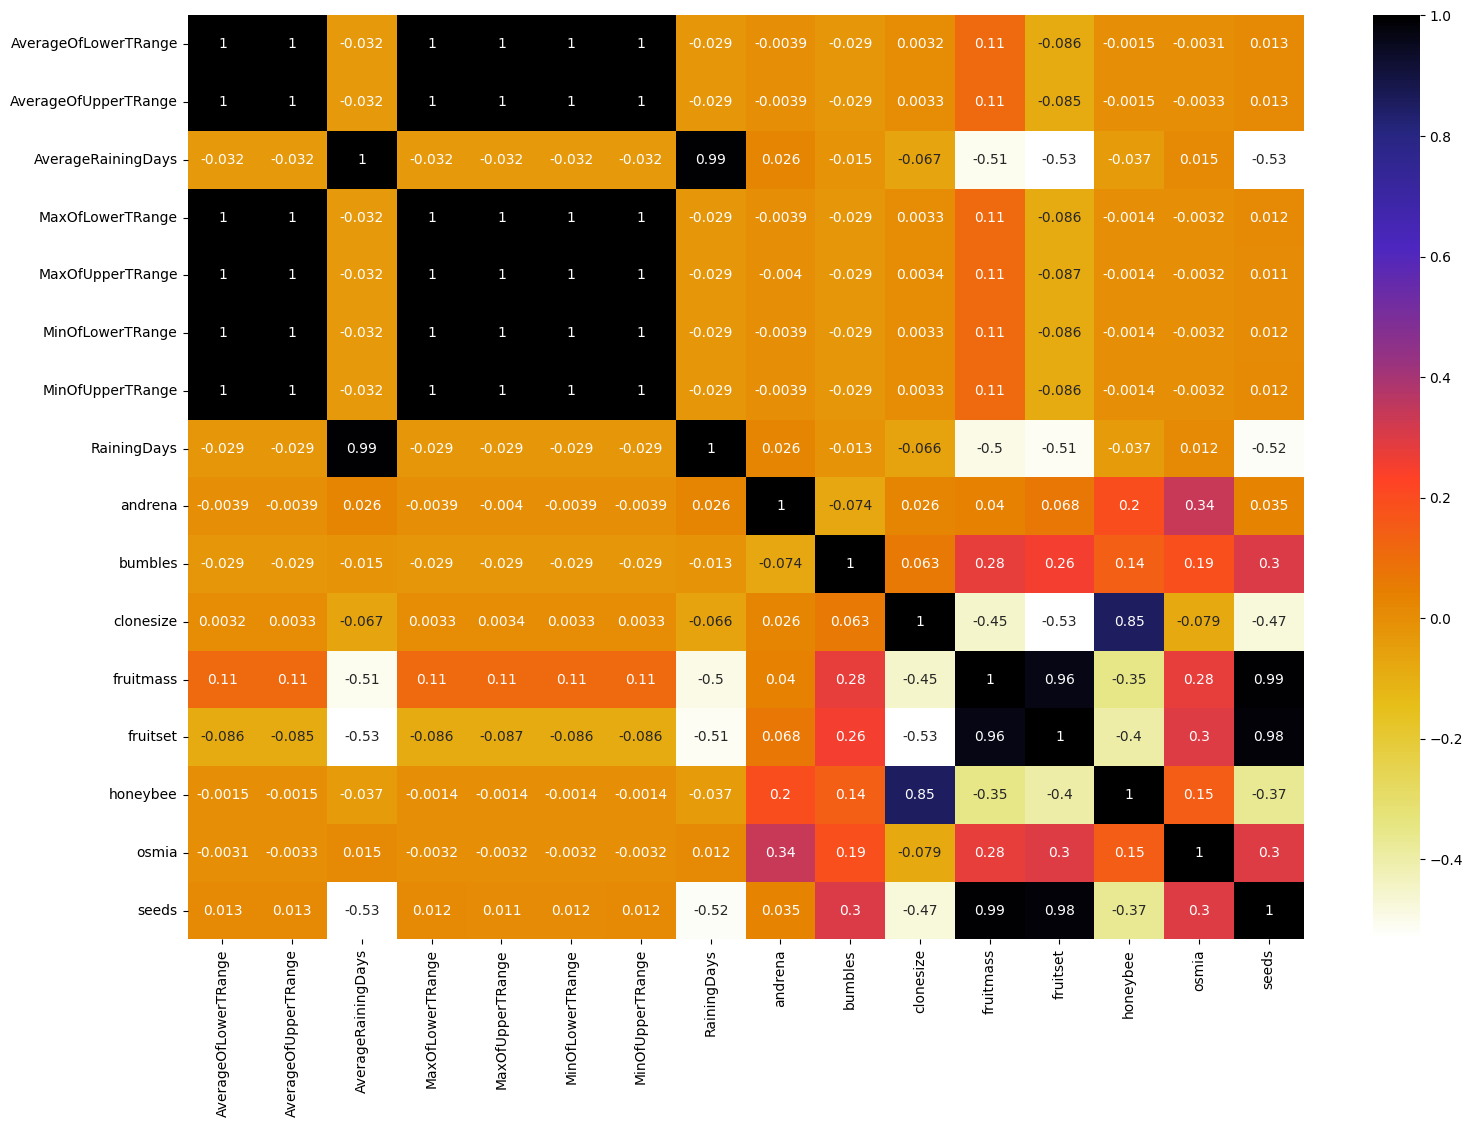

In [ ]:
# Using Pearson Correlation
plt.figure(figsize=(18,12))
cor=X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
#With this function, we can select highly correlated features
#The first feature that is correlated with any other feature will be removed

def correlation(dataset, threshold):
    col_corr = set()  #Set of all the names of Correlated Columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]  #getting the name of the column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

9

In [ ]:
corr_features = {'AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'honeybee'}

corr_features

{'AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'honeybee'}

In [ ]:
X_train.head()

,AverageOfLowerTRange,AverageOfUpperTRange,AverageRainingDays,MaxOfLowerTRange,MaxOfUpperTRange,MinOfLowerTRange,MinOfUpperTRange,RainingDays,andrena,bumbles,clonesize,fruitmass,fruitset,honeybee,osmia,seeds
502,45.8,64.7,0.56,55.8,77.4,27.0,46.8,34.0,0.38,0.25,25.0,0.442953,0.483671,0.50,0.75,35.371142
258,41.2,58.2,0.56,50.2,69.7,24.3,42.1,34.0,0.50,0.25,12.5,0.417365,0.479603,0.25,0.75,33.978779
104,50.8,71.9,0.56,62.0,86.0,30.0,52.0,34.0,0.25,0.25,12.5,0.432110,0.467569,0.25,0.63,34.174625
527,55.9,79.0,0.39,68.2,94.6,33.0,57.2,24.0,0.50,0.25,25.0,0.395894,0.378833,0.50,0.63,30.296663
480,55.9,79.0,0.56,68.2,94.6,33.0,57.2,34.0,0.38,0.25,25.0,0.373749,0.325921,0.50,0.63,27.919448


In [ ]:
X_train = X_train.drop(corr_features, axis=1)
X_test = X_test.drop(corr_features, axis=1)

In [ ]:
X_train.head()

,MaxOfUpperTRange,RainingDays,andrena,bumbles,clonesize,fruitmass,fruitset,osmia,seeds
502,77.4,34.0,0.38,0.25,25.0,0.442953,0.483671,0.75,35.371142
258,69.7,34.0,0.50,0.25,12.5,0.417365,0.479603,0.75,33.978779
104,86.0,34.0,0.25,0.25,12.5,0.432110,0.467569,0.63,34.174625
527,94.6,24.0,0.50,0.25,25.0,0.395894,0.378833,0.63,30.296663
480,94.6,34.0,0.38,0.25,25.0,0.373749,0.325921,0.63,27.919448


In [ ]:
X_train.shape


(601, 9)

In [ ]:
X_test.shape

(151, 9)

Feature 0: 0.124966
Feature 1: 0.209084
Feature 2: 0.016573
Feature 3: 0.034829
Feature 4: 0.150027
Feature 5: 1.632590
Feature 6: 1.925528
Feature 7: 0.095969
Feature 8: 1.650936


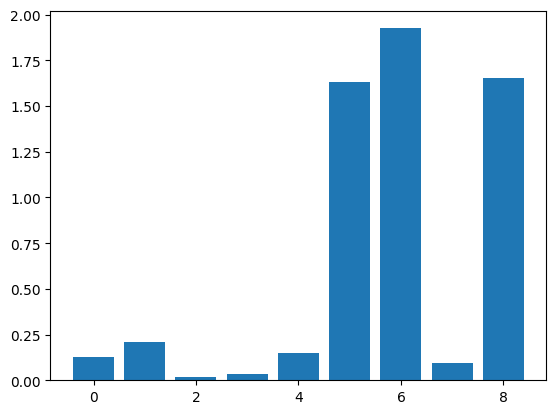

In [ ]:
# Analysis on the basis of either Mutual Information Gain or Correlation Regression Values

# Mutual Information feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# feature selection
def select_features_info_based(X_train, y_train, X_test):
	mutual_info = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	mutual_info.fit(X_train, y_train)
	# transform train input data
	X_train_fs = mutual_info.transform(X_train)
	# transform test input data
	X_test_fs = mutual_info.transform(X_test)
	return X_train_fs, X_test_fs, mutual_info


# Feature Selection
X_train_fs, X_test_fs, fs_info = select_features_info_based(X_train, y_train, X_test)
fs_info
# what are scores for the features
for i in range(len(fs_info.scores_)):
	print('Feature %d: %f' % (i, fs_info.scores_[i]))
# plotting the scores
plt.bar([i for i in range(len(fs_info.scores_))], fs_info.scores_)
plt.show()

Feature 0: 13.139621
Feature 1: 291.735778
Feature 2: 6.262467
Feature 3: 50.396352
Feature 4: 181.436566
Feature 5: 4263.896203
Feature 6: 19076.391809
Feature 7: 80.579273
Feature 8: 9328.836779


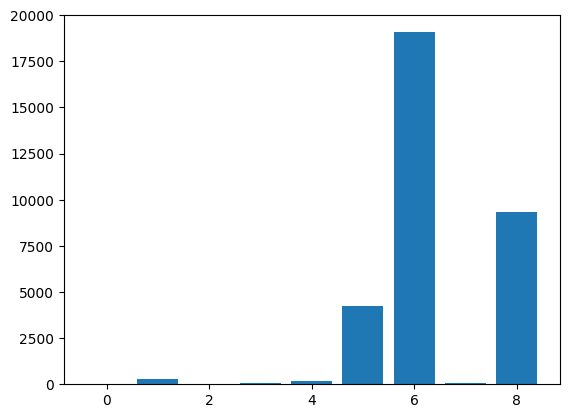

In [ ]:
# Correlation feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Feature Selection
def select_features_corr_based(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_regression, k='all')
	# learning relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs_corr = select_features_corr_based(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs_corr.scores_)):
	print('Feature %d: %f' % (i, fs_corr.scores_[i]))
# plotting the scores
plt.bar([i for i in range(len(fs_corr.scores_))], fs_corr.scores_)
plt.show()

**Modelling**


We will now Train the model on these **9 features** and check the metrics of the same on** 4 Models**:

1.Linear Regression

2.Random Forest

3.Decision Tree

4.XGBoost

In [ ]:
X_train_fsm, X_test_fsm, fs_info_m = select_features_info_based(X_train,y_train,X_test)

In [ ]:
X_train_fsm.shape

(601, 9)

In [ ]:
X_test_fsm.shape

(151, 9)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

Reg = LinearRegression()
Reg.fit(X_train_fsm,y_train)
pred_linear = Reg.predict(X_test_fsm)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae_linear = mean_absolute_error(y_test, pred_linear)
mse_linear = mean_squared_error(y_test, pred_linear)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, pred_linear)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 90.284
MSE: 12892.118
RMSE: 113.543
R-Square: 0.992


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_fsm,y_train)
pred_rf = rf.predict(X_test_fsm)
pred_rf = pred_rf.reshape(151,1)

mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, pred_rf)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)


MAE: 111.939
MSE: 20833.468
RMSE: 144.338
R-Square: 0.987


**Decision** **Tree** **Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train_fsm,y_train)
pred_dtree = dtree_reg.predict(X_test_fsm)

mae_dtree = mean_absolute_error(y_test,pred_dtree)
mse_dtree = mean_squared_error(y_test,pred_dtree)
rmse_dtree = np.sqrt(mse_dtree)
rsq_dtree = r2_score(y_test,pred_dtree)

In [ ]:
print('MAE: %.3f' % mae_dtree)
print('MSE: %.3f' % mse_dtree)
print('RMSE: %.3f' % rmse_dtree)
print('R-Square: %.3f' % rsq_dtree)

MAE: 155.708
MSE: 41140.339
RMSE: 202.831
R-Square: 0.975


**XGboost**

In [ ]:
import xgboost
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train_fsm, y_train)
pred_xgb = xgb_model.predict(X_test_fsm)

mae_xgb = mean_absolute_error(y_test, pred_xgb)
mse_xgb = mean_squared_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test, pred_xgb)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 113.898
MSE: 21145.431
RMSE: 145.415
R-Square: 0.987


**MODEL** **Evaluation**

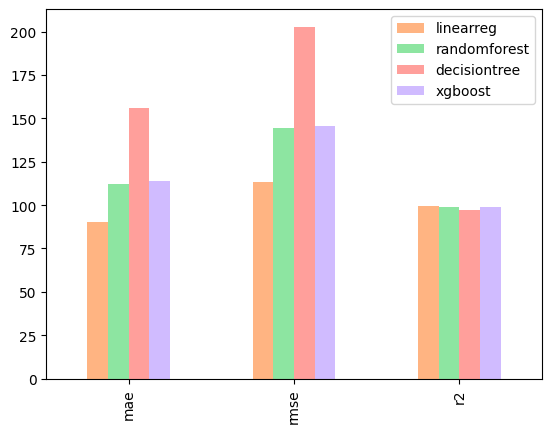

In [ ]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dtree,
        "rmse": rmse_dtree,
        'r2': rsq_dtree*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar",
             color=[
                 sns.color_palette("pastel")[1],
                 sns.color_palette("pastel")[2],
                 sns.color_palette("pastel")[3],
                 sns.color_palette("pastel")[4]]);

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


cv = RepeatedKFold(n_splits= 78,n_repeats = 3,random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)

# define pipeline for each algorithm
# define GSCV for each
# loop through it


pipe_lr = Pipeline([
    ('sel', fs_info_v0),
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0),
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0),
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0),
    ('model', XGBRegressor(random_state=1))
])

# pipe_lr.get_params().keys()

In [ ]:
param_range = [15, 18, 10]
param_range_fl = [5.0, 10.0]

grid_params_lr = [{'sel__k': [i for i in range(X_train_fsm.shape[1]-6, X_train_fsm.shape[1]-4)],
        }]


grid_params_rf = [{'sel__k': [i for i in range(X_train_fsm.shape[1]-6, X_train_fsm.shape[1]-4)],
        'model__criterion': ['squared_error', 'absolute_error'],
#         'model__max_depth': param_range,
#         'model__min_samples_split': param_range[1:]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_train_fsm.shape[1]-6, X_train_fsm.shape[1]-4)],
                    'model__criterion': ['squared_error', 'absolute_error'],
#                      'model__max_depth': param_range,
#                      'model__max_features': ['auto', 'sqrt']
                     }]


grid_params_xgb = [{'sel__k': [i for i in range(X_train_fsm.shape[1]-6, X_train_fsm.shape[1]-4)],
#                     'model__max_depth': [9,12],
#                    'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv,
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv,
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv,
            n_jobs= -1)

grids = [LR,RF,XGB,DT]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression',
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [ ]:
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train_fsm, y_train.values.ravel())
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_test_fsm)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v0)))

        # Track best (least test error) model
        if mean_absolute_error(y_test, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    ## Save best grid search pipeline to file
    # dump_file = 'best_grid_search_pipeline.pkl'
    # joblib.dump(best_gs, dump_file, compress=1)
    # print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_regr], dump_file))

    ########### summarize all values of parameters (uncomment only if nescessary)
    ######### means = results.cv_results_['mean_test_score']
    ######## params = results.cv_results_['params']
    ####### for mean, param in zip(means, params):
    ###### print(">%.3f with: %r" % (mean, param))

    return (grid_dict[best_regr], best_gs, least_mae)

**Prediction and Evaluation**

In [ ]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Logistic Regression
Best Config: {'sel__k': 4}
Best MAE: -119.782
Test set mean absolute error for best params: 117.346 
Test set root mean squared error for best params: 10.833 

Estimator: Random Forest
Best Config: {'model__criterion': 'absolute_error', 'sel__k': 4}
Best MAE: -127.652
Test set mean absolute error for best params: 124.075 
Test set root mean squared error for best params: 11.139 

Estimator: XGBoost
Best Config: {'model__subsample': 1.0, 'sel__k': 4}
Best MAE: -132.811
Test set mean absolute error for best params: 132.838 
Test set root mean squared error for best params: 11.526 

Estimator: Decision Tree
Best Config: {'model__criterion': 'squared_error', 'sel__k': 4}
Best MAE: -166.926
Test set mean absolute error for best params: 158.874 
Test set root mean squared error for best params: 12.605 

Classifier with least test set MAE: Logistic Regression
Best Model: Logistic Regression
Error Rate: 117.3455408621435
GridSea

In [ ]:
grid_params_rf1 = [{
        'model__max_depth': param_range,
        'model__min_samples_split': [2,5]
                  }]

RF1 = GridSearchCV(
    estimator = Pipeline([
                    ('sel', SelectKBest(score_func=mutual_info_regression, k=9)),
                    ('model', RandomForestRegressor(random_state=1, criterion='squared_error'))
                ]),
            param_grid=grid_params_rf1,
            scoring='neg_mean_absolute_error',
            cv=cv,
            n_jobs= -1)


print("Random Forest V-1 optimising...")
RF1.fit(X_train_fsm, y_train)
print('Best Config: %s' % RF1.best_params_)
print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_test_fsm)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v1_rf1)))

Random Forest V-1 optimising...
Best Config: {'model__max_depth': 15, 'model__min_samples_split': 2}
Best MAE: -114.473
Test set mean absolute error for best params: 111.725 
Test set root mean squared error for best params: 10.570 


In [ ]:
#saving the model
import joblib
# Save the random forest grid search pipleline for backup
dump_file_name1 = 'randomforest_blueberry_pollination_tuned_model.joblib'
joblib.dump(RF1, dump_file_name1, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % ("Random Forest", dump_file_name1))


Saved Random Forest tuned model to directory by name: randomforest_blueberry_pollination_tuned_model.joblib


In [ ]:
pd.DataFrame(X_test_fsm).to_csv("X_test_rf_df.csv")
print("\nSaved X_test for RF to CSV")

# # Save final training dataset for backup
joblib.dump(X_train_fsm, "X_train_rf.joblib")
print("\n Saved X_train for RF to joblib file")


Saved X_test for RF to CSV

 Saved X_train for RF to joblib file


In [ ]:

joblib.dump(y_test, "y_test.joblib", compress=1)
print("\nSaved y_test to joblib file")


Saved y_test to joblib file
